In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
FB = int
cols = ['name', 'sex', 'number']
years = range(1880,2011)
pieces = []
#Количество младенцев каждого пола для любого года
df = pd.read_table(r'C:\Python\babynames\yob1929.txt', sep=',', names = cols, engine = 'python')
df = df.fillna(0)
yob = pd.pivot_table(df, index = 'name', columns = 'sex', values = 'number')
yob.sum()

sex
F    1116284.0
M    1074833.0
dtype: float64

In [2]:
#Объединение + дети каждого года
for i in years:
    df = pd.read_table(r'C:\Python\babynames\yob%d.txt'%i, sep=',', names = cols, engine = 'python')
    df['year'] = i    
    pieces.append(df)
    data = pd.concat(pieces, ignore_index = True)    
data = data.fillna(0)
data

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


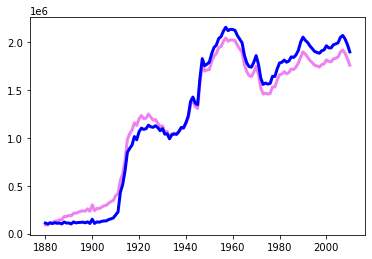

In [3]:
#График
i = range(1880,2011)
wasd = pd.pivot_table(data, index = 'year', columns = 'sex', values = 'number', aggfunc = np.sum) 
plt.plot(i, wasd['F'], color = 'violet', lw = 3)
plt.plot(i, wasd['M'], color = 'blue', lw = 3)   
plt.show() 

In [4]:
#Добавление population + Доля младенцев получивших данное имя, относительно всех родившихся
data['proportion'] = data['number'] / data.shape[0]
data

,name,sex,number,year,proportion
0,Mary,F,7065,1880,0.004179
1,Anna,F,2604,1880,0.001540
2,Emma,F,2003,1880,0.001185
3,Elizabeth,F,1939,1880,0.001147
4,Minnie,F,1746,1880,0.001033
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


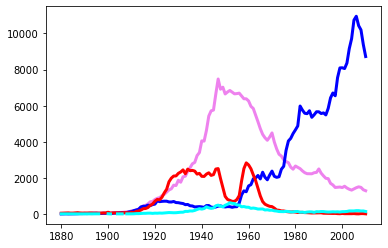

In [5]:
#График относительной доли младенцив с именами: 'Johnny', 'Natalie', 'Bob', 'Denis'
qwe = pd.pivot_table(data, index = 'year', columns = 'name', values = 'number', aggfunc = np.sum) 
plt.plot(i, qwe['Johnny'], color = 'violet', lw = 3)
plt.plot(i, qwe['Natalie'], color = 'blue', lw = 3)  
plt.plot(i, qwe['Bob'], color = 'red', lw = 3) 
plt.plot(i, qwe['Denis'], color = 'cyan', lw = 3) 

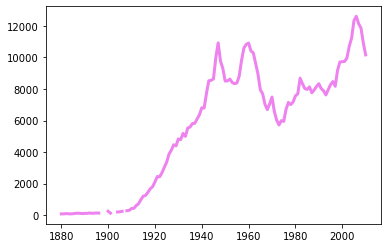

In [6]:
#График общего числа родившихся с именами: 'Johnny', 'Natalie', 'Bob', 'Denis'
qwe = pd.pivot_table(data, index = 'year', columns = 'name', values = 'number', aggfunc = np.sum) 
plt.plot(i, qwe['Johnny'] + qwe['Natalie'] + qwe['Bob'] + qwe['Denis'], color = 'violet', lw = 3)

In [7]:
#Топ имен всех времен
crutch = []
data = pd.DataFrame(data)
for i in range(1880,2011):
    FQ = data[data['year'] == i]
    FQ.sort_values('number',ascending=False)
    Q = FQ.head(1)
    crutch.append(Q)
Q = pd.concat(crutch, ignore_index = True)
Q.pop('proportion')
Q.pop('sex')
print(Q)

         name  number  year
0        Mary    7065  1880
1        Mary    6919  1881
2        Mary    8149  1882
3        Mary    8012  1883
4        Mary    9217  1884
..        ...     ...   ...
126     Emily   21365  2006
127     Emily   19322  2007
128      Emma   18765  2008
129  Isabella   22222  2009
130  Isabella   22731  2010

[131 rows x 3 columns]
